<a href="https://colab.research.google.com/github/piyushyadav-art/-Machine-Learning-/blob/main/Building_Linear_Regression_from_scratch_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

Y = wX + b


Y --> Dependent variable                  
X --> Independent variable                   
w -->weight                                
b --> bias

**Gradient Descent**

w = w-ɑ*db

b = b-ɑ*db

**Learning Rate**

dw = -2/n∑xi(yi-yipred)                     
db = -2/n∑(yi-yipred)

In [ ]:
# importing numpy library
import numpy as np

Linear Regration Model

In [ ]:
class Linear_Regression():

# initiating the parameters(learning_rate,n0_of_iterations)

  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self,X,Y):

    # number of training examples and no of features
    self.m,self.n = X.shape  # number of rows and columns

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implimenting Gradient Desent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):
    Y_prediction = self.predict(self.X)

    # calculating gradients
    dw = -(2*(self.X.T).dot(self.Y-Y_prediction))/self.m

    db = -2*np.sum(self.Y-Y_prediction)/self.m

    # Updating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w) + self.b


**Using Linear Regration model for prediction**

In [ ]:
# importing the dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
# print the first 5 column of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


*Spliting the feature and target value*

In [ ]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Spliting the data set into trainong and test data **

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

Training the linear regration model

In [ ]:
model = Linear_Regression(learning_rate = 0.02,no_of_iterations= 1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
# print the parameter value(weight & bias)
print('weight =',model.w[0])
print('bias =',model.b)

weight = 9514.400999035135
bias = 23697.406507136307


Y = 9514(x) + 23697                        
salary = 9514(experience) + 23697

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values & actual values

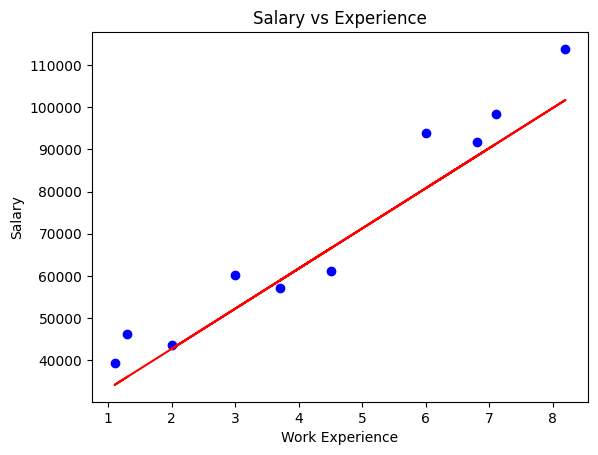

In [ ]:
plt.scatter(X_test,Y_test,color="blue")
plt.plot(X_test,test_data_prediction,color='red')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()